In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pandas as pd
import numpy as np
import sklearn
import scanpy as sc

In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)

#Normalize
for adata in [
    adata_spatial_anterior,
    adata_spatial_posterior,
]:
    sc.pp.normalize_total(adata, inplace=True)

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
cffi                1.15.1
colorama            0.4.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.0
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           0.9.1
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.11
ipykernel           6.15.1
ipython_genutils    0.2.0
ipywidgets          7.7.1
jedi                0.18.1
joblib              1.1.0
jupyter_server      1.18.1
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.38.1
matplotlib          3.5.1
matplotlib_inline   NA
mpl_toolkits        NA
natsort             8.1.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.55.2
numexpr             2.8.3
numpy               1.22.4
packaging

  0%|          | 0.00/8.81M [00:00<?, ?B/s]

  0%|          | 0.00/19.6M [00:00<?, ?B/s]

reading /home/wma/AGrEDA/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5
 (0:00:00)


/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  0%|          | 0.00/9.26M [00:00<?, ?B/s]

  0%|          | 0.00/20.1M [00:00<?, ?B/s]

reading /home/wma/AGrEDA/data/V1_Mouse_Brain_Sagittal_Posterior/filtered_feature_bc_matrix.h5
 (0:00:00)
normalizing counts per cell
    finished (0:00:00)


/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


normalizing counts per cell
    finished (0:00:00)


In [3]:
adata_spatial_anterior.X

<2695x32285 sparse matrix of type '<class 'numpy.float32'>'
	with 15850802 stored elements in Compressed Sparse Row format>

In [4]:
adata.obs_names

Index(['AAACAAGTATCTCCCA-1', 'AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1',
       'AAACAGCTTTCAGAAG-1', 'AAACAGGGTCTATATT-1', 'AAACATTTCCCGGATT-1',
       'AAACCCGAACGAAATC-1', 'AAACCGGAAATGTTAA-1', 'AAACCGGGTAGGTACC-1',
       'AAACCGTTCGTCCAGG-1',
       ...
       'TTGTGGCCCTGACAGT-1', 'TTGTGGTAGGAGGGAT-1', 'TTGTGTATGCCACCAA-1',
       'TTGTGTTTCCCGAAAG-1', 'TTGTTAGCAAATTCGA-1', 'TTGTTCAGTGTGCTAC-1',
       'TTGTTGTGTGTCAAGA-1', 'TTGTTTCACATCCAGG-1', 'TTGTTTCATTAGTCTA-1',
       'TTGTTTCCATACAACT-1'],
      dtype='object', length=3355)

In [5]:
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm19938', 'Gm37381', 'Rp1', 'Sox17', 'Gm37587',
       'Gm37323', 'Mrpl15', 'Lypla1',
       ...
       'Gm16367', 'AC163611.1', 'AC163611.2', 'AC140365.1', 'AC124606.2',
       'AC124606.1', 'AC133095.2', 'AC133095.1', 'AC234645.1', 'AC149090.1'],
      dtype='object', length=32285)

In [6]:
adata.obs

,in_tissue,array_row,array_col
AAACAAGTATCTCCCA-1,1,50,102
AAACACCAATAACTGC-1,1,59,19
AAACAGAGCGACTCCT-1,1,14,94
AAACAGCTTTCAGAAG-1,1,43,9
AAACAGGGTCTATATT-1,1,47,13
...,...,...,...
TTGTTCAGTGTGCTAC-1,1,24,64
TTGTTGTGTGTCAAGA-1,1,31,77
TTGTTTCACATCCAGG-1,1,58,42
TTGTTTCATTAGTCTA-1,1,60,30


In [7]:
adata.to_df().std()

Xkr4          0.122429
Gm1992        0.024551
Gm19938       0.127411
Gm37381       0.000000
Rp1           0.024450
                ...   
AC124606.1    0.000000
AC133095.2    0.000000
AC133095.1    0.000000
AC234645.1    0.000000
AC149090.1    2.121894
Length: 32285, dtype: float32

# Single cell Data: GSE115746


In [8]:
adata_cortex = sc.read_csv('./data/GSE115746_cells_exon_counts.csv').T
adata_cortex_meta = pd.read_csv('./data/GSE115746_complete_metadata_28706-cells.csv', index_col=0)
adata_cortex_meta_ = adata_cortex_meta.loc[adata_cortex.obs.index,]

adata_cortex.obs = adata_cortex_meta_
adata_cortex.var_names_make_unique()  

In [9]:
adata_cortex

AnnData object with n_obs × n_vars = 23178 × 45768
    obs: 'title', 'source_name', 'organism', 'donor_id', 'donor_sex', 'donor_genotype', 'injection_type', 'injection_target', 'injected_material', 'dissected_region', 'dissected_layer', 'facs_gating', 'facs_date', 'rna_amplification_set', 'sequencing_tube', 'sequencing_batch', 'sequencing_qc_pass_fail', 'cell_class', 'cell_subclass', 'cell_cluster', 'molecule', 'SRA_Run', 'GEO_Sample', 'GEO_Sample_Title'

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:52)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


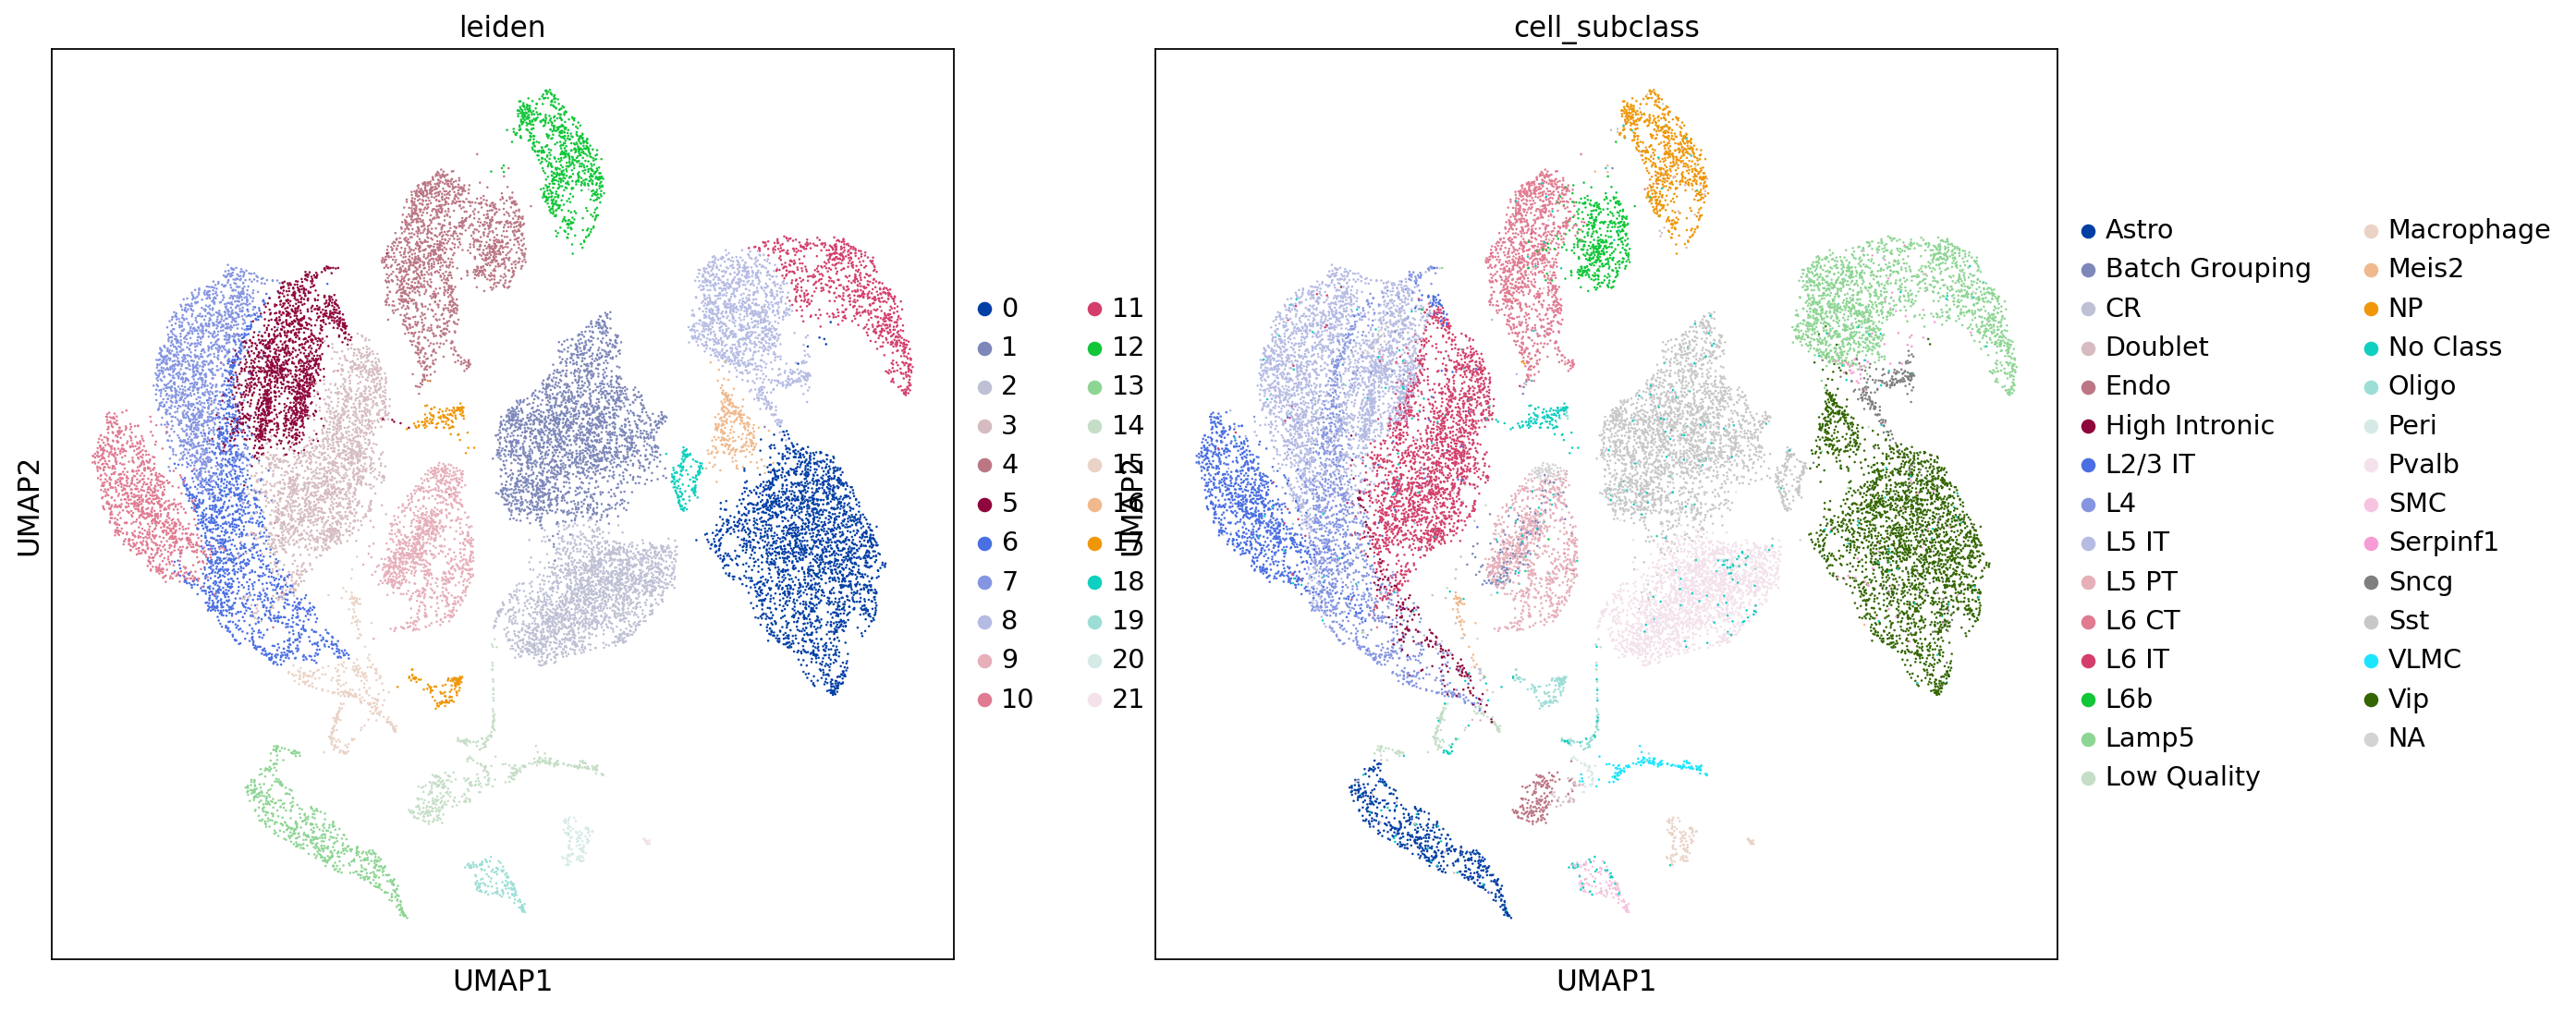

In [10]:
#Preprocessing
adata_cortex.var['mt'] = adata_cortex.var_names.str.startswith('Mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_cortex, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pp.normalize_total(adata_cortex)

#PCA and clustering : Known markers with 'cell_subclass'
# sc.tl.pca(adata_cortex, svd_solver='arpack')
# sc.pp.neighbors(adata_cortex, n_neighbors=10, n_pcs=40)
# sc.tl.umap(adata_cortex)
# sc.tl.leiden(adata_cortex, resolution = 0.5)
# sc.pl.umap(adata_cortex, color=['leiden','cell_subclass'])

In [11]:
sc.tl.rank_genes_groups(adata_cortex, 'cell_subclass', method='wilcoxon')

ranking genes


/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_gr

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:09:11)


/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [12]:
genelists=adata_cortex.uns['rank_genes_groups']['names']
df_genelists = pd.DataFrame.from_records(genelists)
df_genelists.head(5)

num_markers=10
res_genes = []
for column in df_genelists.head(num_markers): 
    res_genes.extend(df_genelists.head(num_markers)[column].tolist())
res_genes_ = list(set(res_genes))

adata_spatial_anterior.var_names_make_unique() 
inter_genes = [val for val in res_genes_ if val in adata_spatial_anterior.var.index]
print('Selected Feature Gene number',len(inter_genes))
adata_cortex = adata_cortex[:,inter_genes]

adata_spatial_anterior = adata_spatial_anterior[:,inter_genes]

Selected Feature Gene number 228


In [20]:
from sklearn.preprocessing import OneHotEncoder

def random_mix(Xs, ys, nmix=5, n_samples=10000, seed=0):
    # Define empty lists
    Xs_new, ys_new =[], []
    ys_ = OneHotEncoder().fit_transform(ys.reshape(-1, 1)).toarray()

    rstate = np.random.RandomState(seed)
    fraction_all = rstate.rand(n_samples, nmix)
    randindex_all = rstate.randint(len(Xs), size=(n_samples,nmix))

    for i in range(n_samples):
        # fraction: random fraction across the "nmix" number of sampled cells
        fraction = fraction_all[i]
        fraction = fraction/np.sum(fraction)
        fraction = np.reshape(fraction, (nmix,1))
        
        # Random selection of the single cell data by the index
        randindex = randindex_all[i]
        ymix = ys_[randindex]
        # Calculate the fraction of cell types in the cell mixture
        yy = np.sum(ymix*fraction, axis=0)
        # Calculate weighted gene expression of the cell mixture
        XX = np.asarray(Xs[randindex])*fraction
        XX_ = np.sum(XX, axis=0)
        
        # Add cell type fraction & composite gene expression in the list
        ys_new.append(yy)
        Xs_new.append(XX_)

    Xs_new = np.asarray(Xs_new)
    ys_new = np.asarray(ys_new)

    return Xs_new, ys_new

In [72]:
mat_sc = adata_cortex.X
mat_sp = adata_spatial_anterior.X.todense()

df_sc = adata_cortex.obs

lab_sc_sub = df_sc.cell_subclass
sc_sub_dict = dict(zip(range(len(set(lab_sc_sub))), set(lab_sc_sub)))
sc_sub_dict2 = dict((y,x) for x,y in sc_sub_dict.items())
lab_sc_num = [sc_sub_dict2[ii] for ii in lab_sc_sub]
lab_sc_num = np.asarray(lab_sc_num, dtype='int')

sc_mix, lab_mix = random_mix(mat_sc, lab_sc_num, nmix=8, n_samples=len(mat_sp))

def log_minmaxscale(arr):
    arrd = len(arr)
    arr = np.log1p(arr)
    return (arr-np.reshape(np.min(arr,axis=1), (arrd,1)))/np.reshape((np.max(arr, axis=1)-np.min(arr,axis=1)),(arrd,1))

sc_mix_s = log_minmaxscale(sc_mix)
mat_sp_s = log_minmaxscale(mat_sp)
mat_sc_s = log_minmaxscale(mat_sc)


In [73]:
OneHotEncoder().fit_transform(lab_sc_num.reshape(-1, 1)).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
mat_sc.shape

(23178, 228)

In [75]:
pd.DataFrame(sc_mix_s).std().mean()

0.12905537749254817

In [76]:
pd.DataFrame(mat_sp_s).std().mean()

0.1311873495578766

In [90]:
pd.DataFrame(sc_mix_s).mean().mean()

0.43051274185272453

In [88]:
pd.DataFrame(mat_sp_s).mean().mean()

0.23272623121738434

In [77]:
all_df = pd.concat([pd.DataFrame(sc_mix_s), pd.DataFrame(mat_sp_s)], keys = [0, 1])

In [78]:
all_df

0         1         2         3         4         5         6    \
0 0     0.378880  0.009362  0.637022  0.616077  0.000000  0.421432  0.384989   
  1     0.550735  0.000000  0.072800  0.649264  0.000000  0.730635  0.666828   
  2     0.480711  0.000000  0.000000  0.612725  0.000000  0.655756  0.698901   
  3     0.371775  0.000000  0.000000  0.608359  0.028443  0.595130  0.621319   
  4     0.130470  0.521197  0.809664  0.637176  0.039125  0.144711  0.512748   
...          ...       ...       ...       ...       ...       ...       ...   
1 2690  0.000000  0.337860  0.466379  0.529703  0.000000  0.141719  0.141719   
  2691  0.000000  0.344475  0.451303  0.451303  0.000000  0.385734  0.230542   
  2692  0.360172  0.399898  0.433408  0.583449  0.000000  0.000000  0.000000   
  2693  0.000000  0.626430  0.665675  0.437932  0.204533  0.204533  0.310792   
  2694  0.196286  0.589415  0.568626  0.414696  0.196286  0.000000  0.000000   

             7         8         9    ...       218       219       220  \
0 0     0.181590  0.736510  0.307952  ...  0.609761  0.771519  0.774957   
  1     0.438004  0.570810  0.268887  ...  0.332864  0.834736  0.882734   
  2     0.440134  0.586596  0.250142  ...  0.000000  0.782759  0.933953   
  3     0.299264  0.604972  0.491398  ...  0.000000  0.803759  0.860245   
  4     0.324677  0.659872  0.590764  ...  0.525174  0.770666  0.819769   
...          ...       ...       ...  ...       ...       ...       ...   
1 2690  0.000000  0.289501  0.141719  ...  0.000000  0.510528  0.529703   
  2691  0.142547  0.142547  0.142547  ...  0.142547  0.502480  0.580048   
  2692  0.158094  0.311385  0.000000  ...  0.000000  0.510723  0.598341   
  2693  0.000000  0.000000  0.000000  ...  0.437932  0.383079  0.551061   
  2694  0.196286  0.196286  0.000000  ...  0.196286  0.545560  0.641743   

             221       222       223       224       225       226       227  
0 0     0.547116  0.586992  0.545055  0.481442  0.855055  0.671888  0.000000  
  1     0.751666  0.626960  0.835496  0.000000  0.841708  0.708750  0.000000  
  2     0.814712  0.358049  0.814612  0.626822  0.813888  0.773001  0.368721  
  3     0.623110  0.700668  0.531316  0.000000  0.706412  0.699002  0.000000  
  4     0.586761  0.679713  0.822350  0.089995  0.788717  0.702425  0.621313  
...          ...       ...       ...       ...       ...       ...       ...  
1 2690  0.489545  0.489545  0.807134  0.337860  0.289501  0.547358  0.000000  
  2691  0.562928  0.294365  0.829723  0.142547  0.344475  0.478286  0.294365  
  2692  0.462385  0.158094  0.625345  0.598341  0.311385  0.531341  0.158094  
  2693  0.310792  0.310792  0.958849  0.204533  0.579033  0.310792  0.383079  
  2694  0.455763  0.545560  0.766364  0.000000  0.625702  0.414696  0.296153  

[5390 rows x 228 columns]

In [79]:
all_z_df = all_df.copy()

In [80]:
from sklearn.preprocessing import StandardScaler

all_z_df.loc[0] = StandardScaler().fit_transform(all_z_df.loc[0])
all_z_df.loc[1] = StandardScaler().fit_transform(all_z_df.loc[1])

In [81]:
all_z_df

0         1         2         3         4         5         6    \
0 0    -0.092134 -0.611827  1.362952  0.605314 -0.420817 -1.180234 -1.775844   
  1     1.053718 -0.644648 -0.533814  1.447043 -0.420817  2.156735  1.471823   
  2     0.586827 -0.644648 -0.778547  0.520285 -0.420817  1.348629  1.841405   
  3    -0.139507 -0.644648 -0.778547  0.409555 -0.217108  0.694344  0.947418   
  4    -1.748412  1.182578  1.943330  1.140452 -0.140601 -4.166642 -0.303668   
...          ...       ...       ...       ...       ...       ...       ...   
1 2690 -1.478165 -0.323240  0.087152 -0.178339 -0.597713 -0.423405  0.002981   
  2691 -1.478165 -0.276280 -0.014766 -0.818956 -0.597713  1.155051  0.666868   
  2692  0.316578  0.117204 -0.135743  0.260823 -0.597713 -1.340141 -1.056265   
  2693 -1.478165  1.725477  1.434444 -0.928216  1.527178 -0.017078  1.266679   
  2694 -0.500071  1.462692  0.778366 -1.118078  1.441492 -1.340141 -1.056265   

             7         8         9    ...       218       219       220  \
0 0    -1.505190  1.875238 -0.520539  ...  2.337105  0.146167 -1.016589   
  1     0.513345 -0.247145 -0.753730  ...  0.986157  1.797625  1.134336   
  2     0.530117 -0.044951 -0.865622  ... -0.637846  0.439785  2.156511   
  3    -0.578842  0.190417  0.574495  ... -0.637846  0.988382  0.685517   
  4    -0.378785  0.893604  1.167635  ...  1.924415  0.123873 -0.122273   
...          ...       ...       ...  ...       ...       ...       ...   
1 2690 -0.414621 -0.228003  0.728044  ... -1.668303  0.328481 -0.578879   
  2691  1.672705 -1.041116  0.736137  ... -0.651906  0.270202 -0.219356   
  2692  1.900360 -0.106917 -0.656440  ... -1.668303  0.329896 -0.088717   
  2693 -0.414621 -1.829849 -0.656440  ...  1.454253 -0.594422 -0.426357   
  2694  2.459594 -0.743776 -0.656440  ... -0.268740  0.582158  0.221227   

             221       222       223       224       225       226       227  
0 0    -1.428251 -0.476338 -1.432781  0.466499  1.411582 -0.454708 -0.780779  
  1     1.335550 -0.137038  1.547388 -2.408661  1.283349  0.223613 -0.780779  
  2     2.187404 -2.419888  1.333099  1.334705  1.016078  1.405932  0.641883  
  3    -0.401454  0.488684 -1.573756 -2.408661 -0.016482  0.044226 -0.780779  
  4    -0.892580  0.310796  1.412498 -1.871213  0.774250  0.107221  1.616475  
...          ...       ...       ...       ...       ...       ...       ...  
1 2690  1.004786  0.385744  0.493411  1.191627 -1.242630  0.780732 -1.347565  
  2691  1.366526 -0.440041  0.680921  0.008751 -0.862336  0.209124  0.778223  
  2692  0.870900 -1.016587 -1.015585  2.769184 -1.091244  0.648189 -0.205870  
  2693  0.123619 -0.370542  1.752773  0.384158  0.760281 -1.176979  1.418875  
  2694  0.838256  0.622733  0.154991 -0.854561  1.083121 -0.317116  0.791130  

[5390 rows x 228 columns]

In [82]:
all_df.index.get_level_values(0).to_numpy()

array([0, 0, 0, ..., 1, 1, 1])

In [95]:
import umap
from sklearn.decomposition import PCA


from sklearn.manifold import TSNE


def get_PCA_2D(X):
    pca = PCA(n_components=2)
    pca.fit(X)
    return pca.transform(X)

def plot_scatter(X, labels, legend=None, title=""):
    markers=['o','o','o','^']
    n_clusters = labels.max() + 1
    
    if legend is None:
        legend = [str(i) for i in range(n_clusters)]
    
    for i in range(n_clusters):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        print(i, len(points))
        plt.scatter(points[:, 0], points[:, 1], label=legend[i], marker=markers[i%len(markers)])
    
    if labels.min()==-1:
        points = np.array([X[j] for j in range(len(X)) if labels[j] == -1])
        plt.scatter(points[:, 0], points[:, 1], c='black', label='-1')
     
    plt.title(title)
    plt.legend()
    # plt.show()
    
def plot_scatter_subfig(X, labels, ax, legend=None, title=""):
    markers=['.','.','o','^']
    n_clusters = labels.max() + 1
    if legend is None:
        legend = [str(i) for i in range(n_clusters)]
        
    for i in range(n_clusters):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], label=legend[i], marker=markers[i%len(markers)])
    ax.legend(legend)
    if labels.min()==-1:
        points = np.array([X[j] for j in range(len(X)) if labels[j] == -1])
        ax.scatter(points[:, 0], points[:, 1], c='black', label='-1')
        
    ax.set_title(title)

In [96]:
# data_pca = get_PCA_2D(all_df)
# data_umap = umap.UMAP().fit_transform(all_df)
# data_tsne = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=374).fit_transform(all_df)

data_pca_z = get_PCA_2D(all_z_df)
data_umap_z = umap.UMAP().fit_transform(all_z_df)
data_tsne_z = TSNE(n_components=2, learning_rate='auto', init='pca', random_state=374).fit_transform(all_z_df)

/home/wma/miniconda3/envs/agreda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


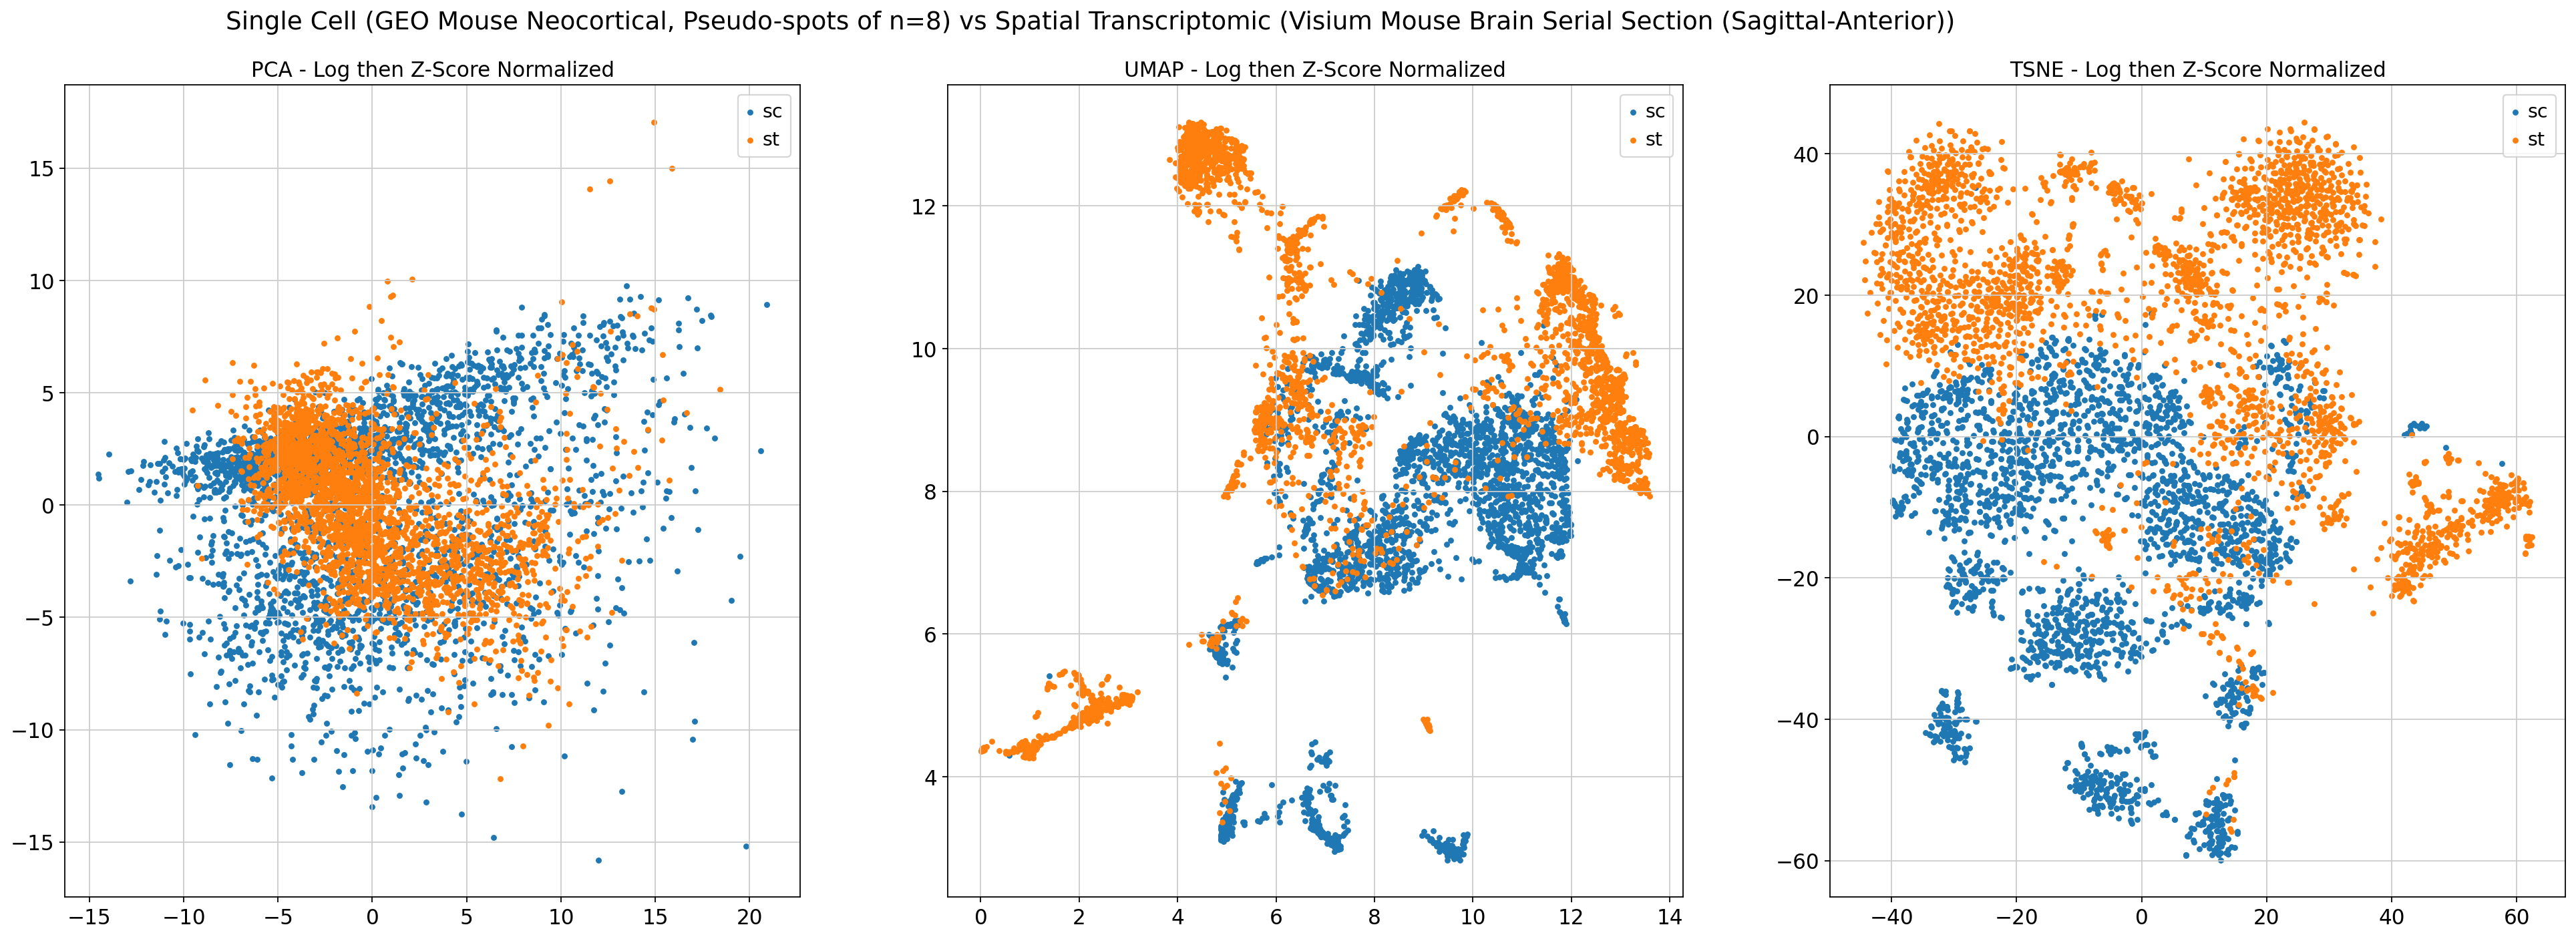

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(30,10))
# plot_scatter_subfig(data_pca, all_df.index.get_level_values(0).to_numpy(), axs[0][0], title=f'PCA - Min-Max Normalized', legend=['sc', 'st'])
# plot_scatter_subfig(data_umap, all_df.index.get_level_values(0).to_numpy(), axs[0][1], title=f'UMAP - Min-Max Normalized', legend=['sc', 'st'])

plot_scatter_subfig(data_pca_z, all_z_df.index.get_level_values(0).to_numpy(), axs[0], title=f'PCA - Log then Z-Score Normalized', legend=['sc', 'st'])
plot_scatter_subfig(data_umap_z, all_z_df.index.get_level_values(0).to_numpy(), axs[1], title=f'UMAP - Log then Z-Score Normalized', legend=['sc', 'st'])
plot_scatter_subfig(data_tsne_z, all_z_df.index.get_level_values(0).to_numpy(), axs[2], title=f'TSNE - Log then Z-Score Normalized', legend=['sc', 'st'])


    
    
fig.suptitle(f'Single Cell (GEO Mouse Neocortical, Pseudo-spots of n=8) vs Spatial Transcriptomic (Visium Mouse Brain Serial Section (Sagittal-Anterior))')

plt.show(block=False)

In [99]:
Z = sch.linkage(all_z_df, method='ward', metric = 'euclidean')

/tmp/ipykernel_3366/856991027.py:72: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(neg, cax=cbaxes, orientation='horizontal',


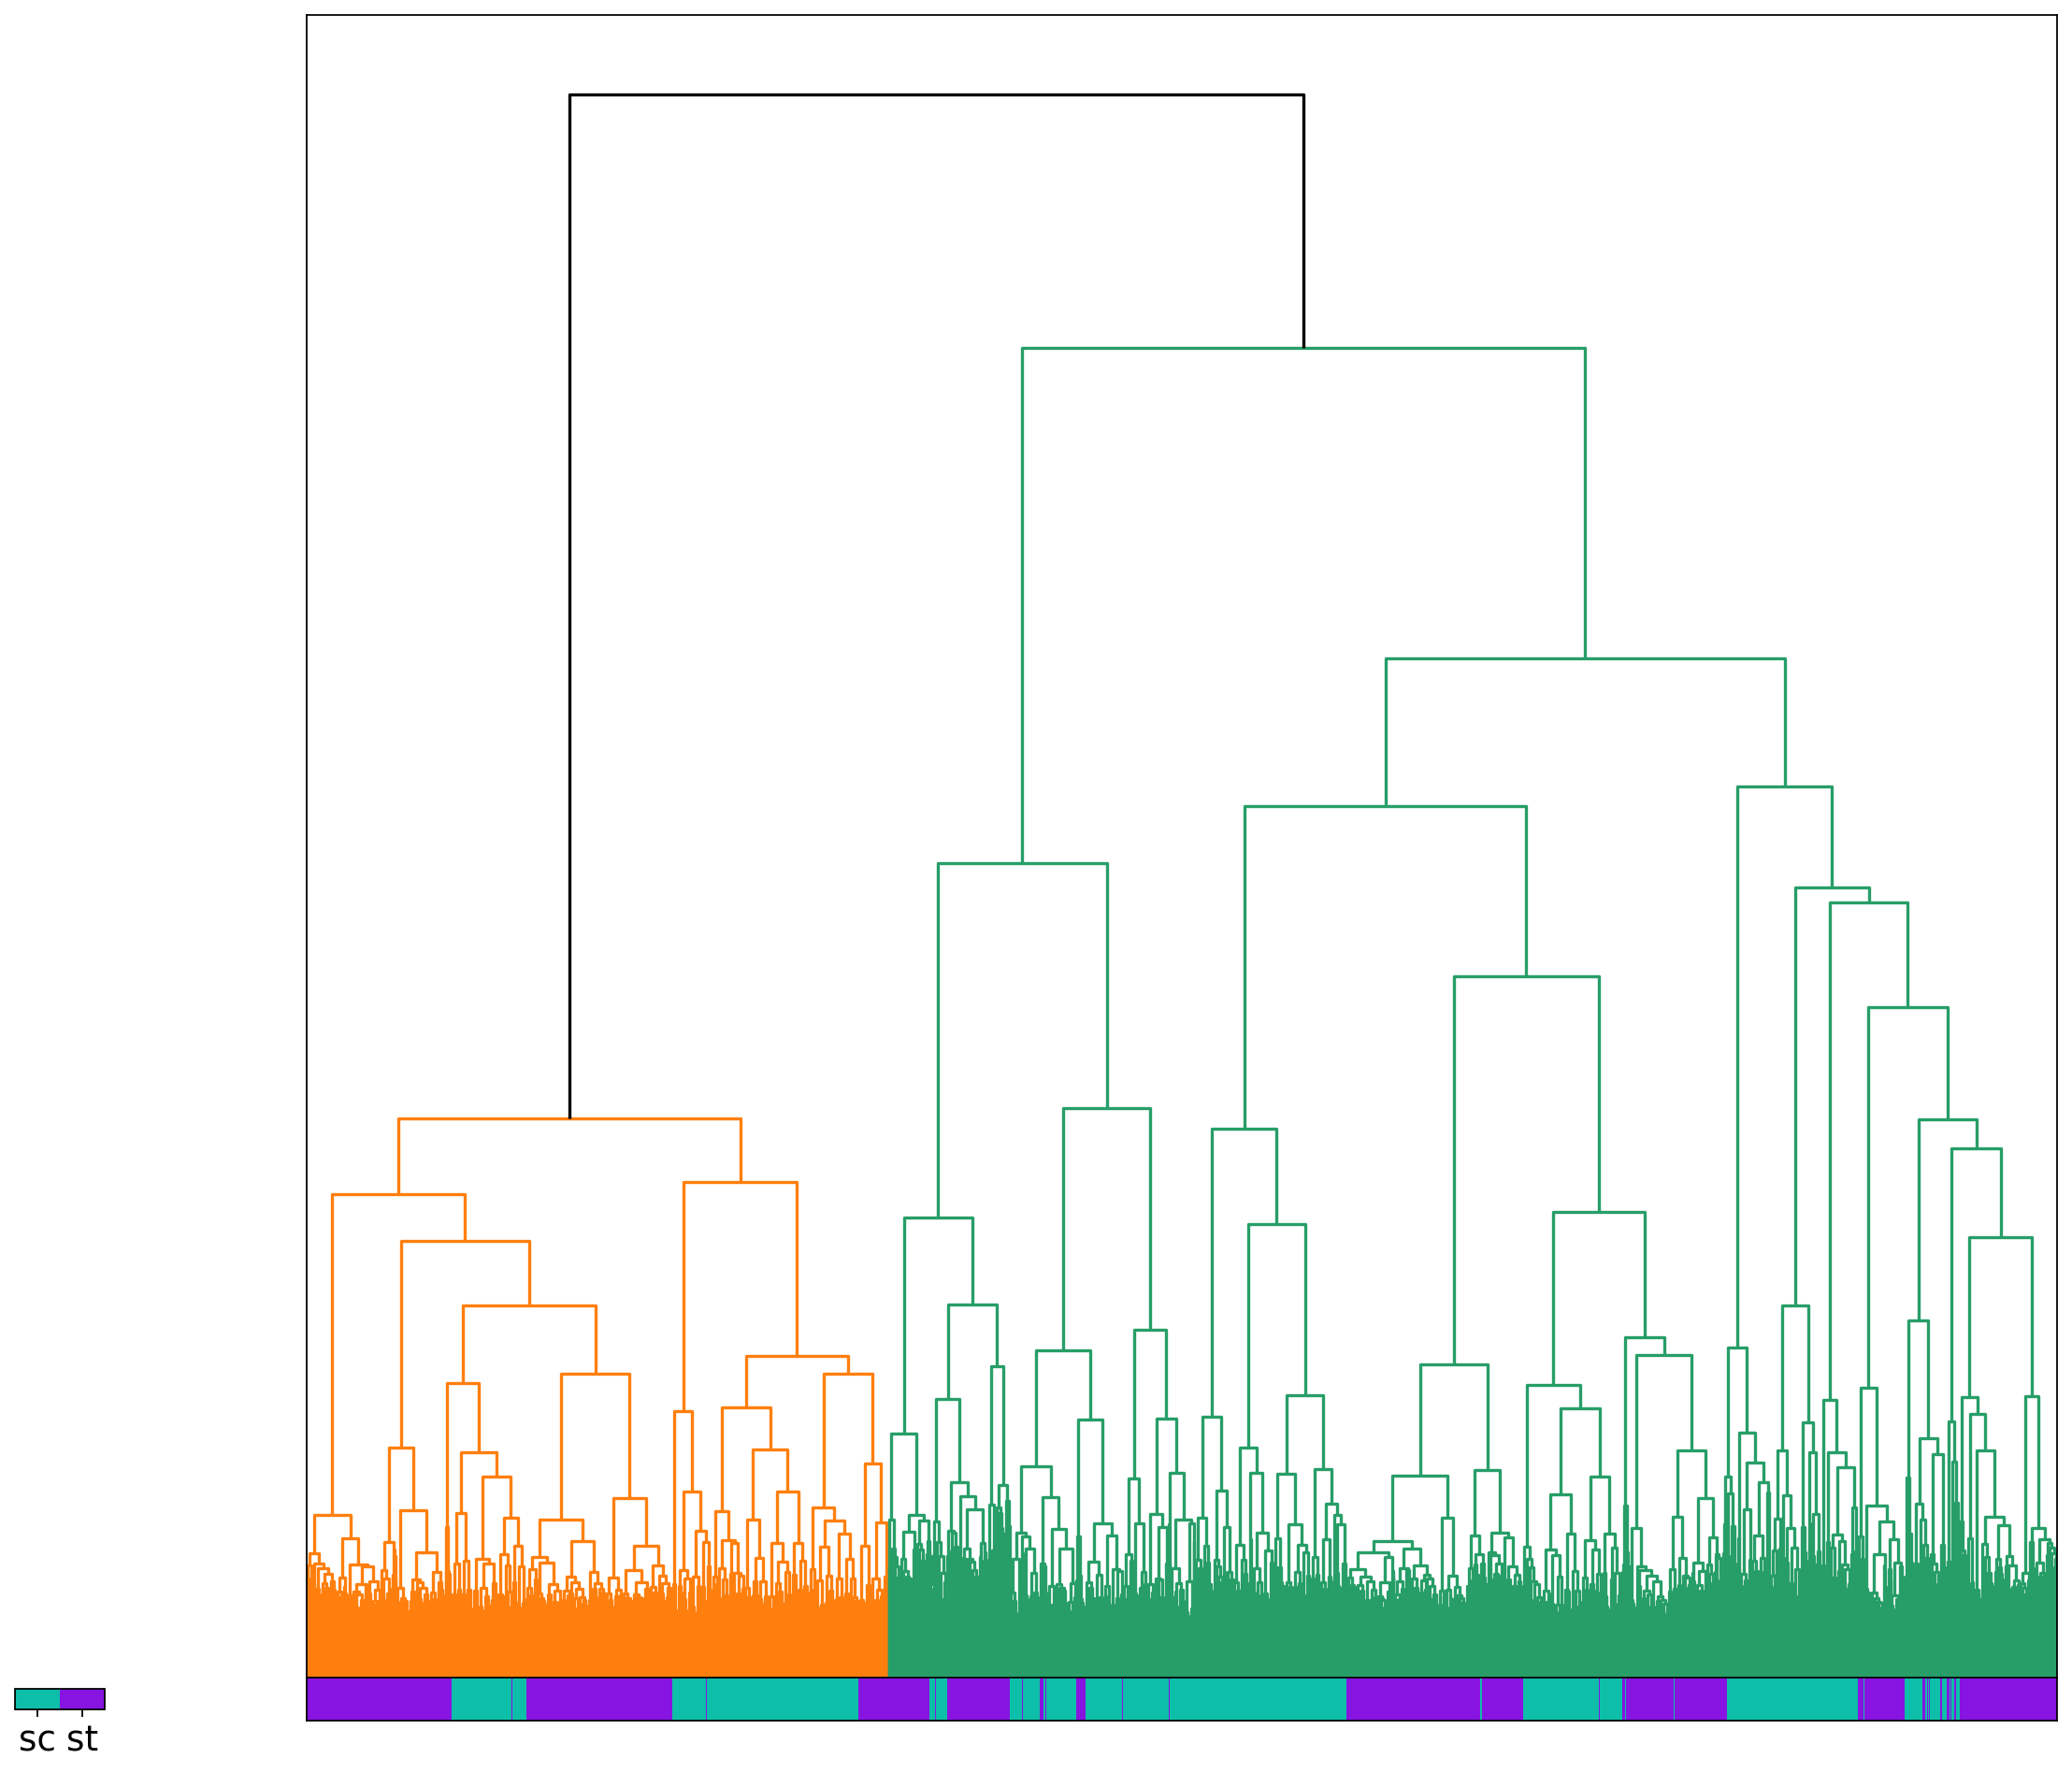

In [113]:
# # import matplotlib.cm
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)),
        N=n
    )
    return new_cmap

from matplotlib.colors import rgb2hex
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2,
                       1,
                       height_ratios=[39, 1],
                       hspace=0.00)

ax2 = fig.add_subplot(gs[0])#add_axes([0,0.75,1,0.45])




clust_labels = all_z_df.index.get_level_values(0).to_numpy()

Z2 = sch.dendrogram(Z, color_threshold = Z[len(Z) - 2+1,2],  above_threshold_color='k')

ax2.set_xticks([])
ax2.set_yticks([])

# label clusters
clust_labels_dendo = clust_labels[Z2['leaves']]

idx2 = Z2['leaves']





axb = fig.add_subplot(gs[1])


cat_vals = clust_labels[idx2]

n=(~np.isnan(np.unique(cat_vals))).sum()

cmap = plt.cm.get_cmap('bwr', n)
cmap = mcolors.ListedColormap(['#0dbea8', '#8714e1'])

cmap.set_bad('white',1.)

neg = axb.matshow(np.atleast_2d(cat_vals),
                       aspect='auto',
                       origin='lower',
                            cmap=cmap)

pos1 = axb.get_position() # get the original position 
cbaxes = fig.add_axes([0.05, pos1.y0 + pos1.height / 4.0,  0.08*(~np.isnan(np.unique(cat_vals))).sum()/4, pos1.height / 2.0])
ticks = np.unique(cat_vals[~np.isnan(cat_vals)])
cbar = fig.colorbar(neg, cax=cbaxes, orientation='horizontal',
                    ticks=[tick-(tick-ticks.mean())/len(ticks) for tick in ticks])
#                             ticks=ticks
#         tick_locs = (np.arange(n) + 0.5)*(n-1)/n
#         cbar.ax.set_ticks(tick_locs)

cbar.ax.set_xticklabels(['sc', 'st'],rotation=0,fontsize='large')


axb.set_yticks([])
axb.set_xticks([])
    # axb.text(-0.01,
    #      0.5,
    #      cat_bar_var,
    #      horizontalalignment='right',
    #      verticalalignment='center',
    #      transform=bar_axs_cat[i].transAxes,
    #                     fontsize='large'
    #     )
#     bar_axs_cat[i].legend(np.unique(labels[cat_bar_var][[(legend[cat_bar_var][label_name] != 'Indeterminate') for label_name in labels[cat_bar_var]]]).tolist(),
#                           [x for x in legend[cat_bar_var] if x != 'Indeterminate'])
    


#     for vert_po in vert_pos:
#         bar_axs_cat[i].axvline(vert_po, color='k', alpha=1)

# pos_hm = axmatrix.get_position()
# cbaxes = fig.add_axes([0.05, pos_hm.y0+ pos1.height*2, 0.13, pos1.height])  #[left, bottom, width, height]
# cbar = plt.colorbar(im,
#                     cax=cbaxes,
#                     orientation='horizontal',
#                     ticks=[1/(1+np.exp(steeepness*2)),
#                            1/(1+np.exp(steeepness*1)),
#                            1/(1+np.exp(steeepness*0)),
#                            1/(1+np.exp(-steeepness*1)),
#                            1/(1+np.exp(-steeepness*2))])
# cbar.ax.set_xticklabels(['-2', '-1', '0', '1', '2'], fontsize='xx-large')  # vertically oriented colorbar
# cbar.ax.xaxis.tick_left()

# fig.suptitle("\n".join(wrap(f'Dendogram and Heatmap - {params_clust["num_clusters"]} Clusters - subset={subset_str}', 100)),y=0.9)

# plt.savefig(os.path.join(results_dir_out, f'Dendo_heat-{params_clust["num_clusters"]}_clusters.png'), dpi=300)
plt.show(block=False)


In [139]:
agglo_clust = sch.cut_tree(Z, n_clusters=2).T[0]

array([0, 0, 1, ..., 1, 0, 0])

In [156]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

clf =  RandomForestClassifier(random_state=23, n_jobs=-1)
# clf = SVC(gamma=2, C=1)
# clf = LogisticRegression()



X_train, X_test, y_train, y_test = train_test_split(
    all_z_df, all_z_df.index.get_level_values(0).to_numpy(), test_size=0.2, random_state=256
)

clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(1.0, 1.0)

In [148]:
y_test.mean(), y_train.mean()

(0.5009276437847866, 0.4997680890538033)

In [154]:
clf = SVC(random_state=20)
# clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.9962894248608535, 1.0)

In [155]:
# clf = SVC(gamma=2, C=1)
clf = LogisticRegression(random_state=27)
clf.fit(X_train, y_train)
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.3673469387755102, 0.5401205936920223)